# Prediction House Prices.

## Introduction

A huge step is always buying a new house. Is it the environment? Is it the general calibre of the house? Is it the size, perhaps? Could it eventually be resold for a profit? Economic growth is crucial since housing demand is frequently seen to be income-elastic, increasing household incomes. Here, we'll utilise machine learning to make data-based predictions about housing prices.

Making a decision about which features should be given priority is undoubtedly tough. In the modern era, machine learning enables an entrepreneur to estimate the house price with the greatest degree of market trend accuracy and to develop a model of the historical dataset on "what happened and why" to predict "what is going to happen."

The project aims to conduct extensive data analysis and the implementation of various machine learning techniques in Python in order to create the best model with the most important features of a house in terms of both business value and realistic perspective. The dataset contains 11 different variables for 532 different houses.

### Aim: 
- Performing necessary feature engineering step to clean clean and modify the data. 
- Identifying important features that may play important role to predict house price.
- Predicitng house price using a machine learning model

In [81]:
# Importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [82]:
HP_raw = pd.read_excel('House_price.xlsx') # reading dataset
HP = HP_raw.copy() # creating a new copy

In [83]:
HP.head() # exploring first five variables to identify anamolies in the data

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,4 rooms,2 bathroom,3.0,yes,no,no,yes,2.0,furnished
1,12250000.0,8960.0,4 rooms,4 bathroom,4.0,yes,no,no,yes,3.0,furnished
2,12250000.0,9960.0,3 rooms,2 bathroom,2.0,yes,no,no,no,2.0,semi-furnished
3,12215000.0,7500.0,4 rooms,2 bathroom,2.0,yes,no,no,yes,3.0,furnished
4,11410000.0,NaN,4 rooms,1 bathroom,2.0,yes,yes,no,yes,2.0,furnished


- There are missing values present in few columns
- no_bedrooms and no_bathrooms need to be performed well.

In [84]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           530 non-null    float64
 1   area              516 non-null    float64
 2   no_bedrooms       531 non-null    object 
 3   no_bathrooms      531 non-null    object 
 4   total_stories     530 non-null    float64
 5   mainroad_loc      530 non-null    object 
 6   guestroom         530 non-null    object 
 7   hotwater          531 non-null    object 
 8   airconditioner    530 non-null    object 
 9   parking           531 non-null    float64
 10  furnishingstatus  530 non-null    object 
dtypes: float64(4), object(7)
memory usage: 45.8+ KB


In [85]:
HP.shape # Rechecking the number of observations and variables in the dataset

(532, 11)

In [86]:
HP.describe(include = 'all')

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
count,5.300000e+02,516.000000,531,531,530.000000,530,530,531,530,531.000000,530
unique,NaN,NaN,6,4,NaN,2,2,2,2,NaN,3
top,NaN,NaN,3 rooms,1 bathroom,NaN,yes,no,no,no,NaN,semi-furnished
freq,NaN,NaN,290,392,NaN,455,435,507,361,NaN,223
mean,4.780457e+06,5173.277132,NaN,NaN,1.800000,NaN,NaN,NaN,NaN,0.691149,NaN
std,1.871737e+06,2196.618447,NaN,NaN,0.863895,NaN,NaN,NaN,NaN,0.859298,NaN
min,1.750000e+06,1650.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,3.465000e+06,3596.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,4.340000e+06,4600.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,5.766250e+06,6405.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN


In [87]:
HP.columns

Index(['h_price', 'area', 'no_bedrooms', 'no_bathrooms', 'total_stories',
       'mainroad_loc', 'guestroom', 'hotwater', 'airconditioner', 'parking',
       'furnishingstatus'],
      dtype='object')

### Dealing with missing values

In [88]:
HP.isnull().sum() # checking total number of missing values in each column

h_price              2
area                16
no_bedrooms          1
no_bathrooms         1
total_stories        2
mainroad_loc         2
guestroom            2
hotwater             1
airconditioner       2
parking              1
furnishingstatus     2
dtype: int64

In [89]:
# checking if one observation has missing values more than 1
Missing_I = HP.isnull().sum(axis = 1)
Missing_I = Missing_I[Missing_I > 1]
Missing_I

90     7
121    7
dtype: int64

<AxesSubplot: >

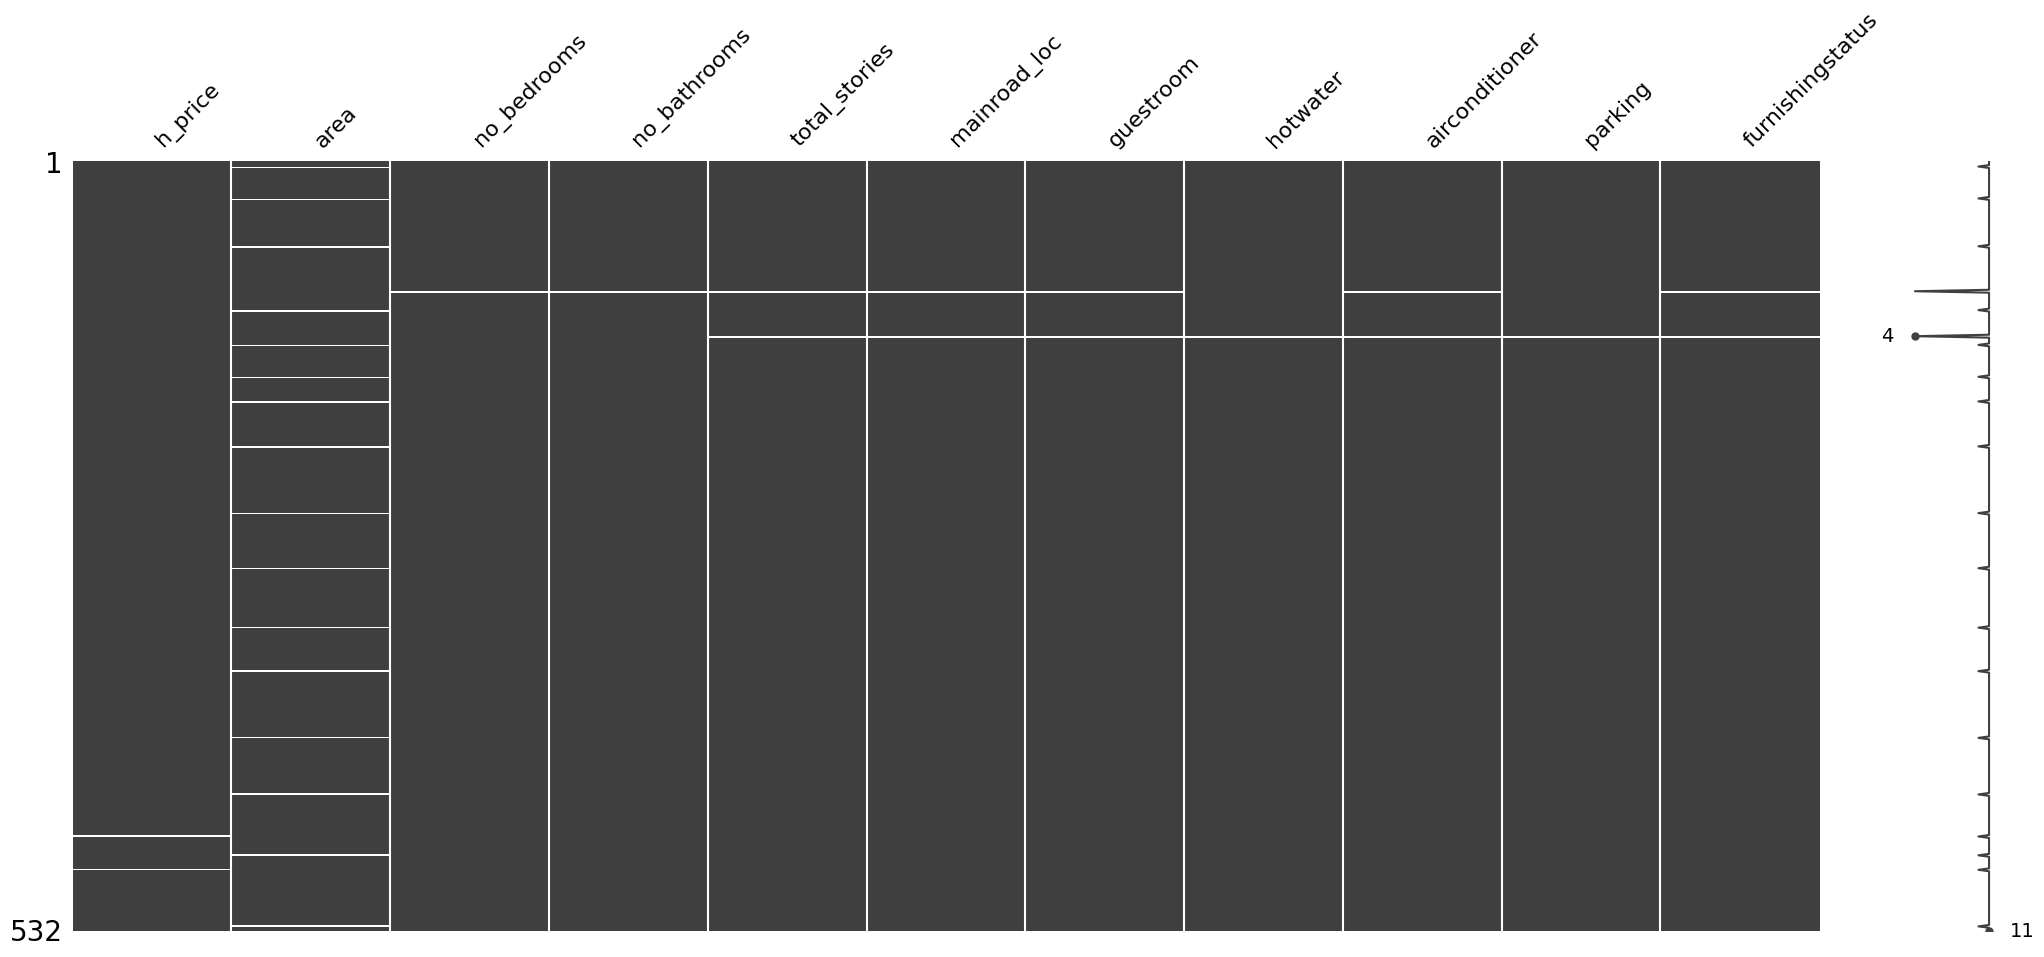

In [90]:
# visualization of missing values
import missingno as msno
msno.matrix(HP)

- Apart from area column, rest other columns have very less missing values. 
- Either we can remove them or replace with something like mean or median too.
- Label data (house price) also has some missing values. We have to remove it as it is labelled column.
- There are 7 missing values in index 90 and 121. It is also very clear from missing plots. Hence, they have to be romoved.

In [91]:
# Dropping the 2 rows with null values for all variables
HP.drop(HP[HP['total_stories'].isnull()].index,axis=0, inplace=True)

In [92]:
# Dropping the null values from target variable
HP.drop(HP[HP['h_price'].isnull()].index,axis=0, inplace=True)

In [93]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 531
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   h_price           528 non-null    float64
 1   area              512 non-null    float64
 2   no_bedrooms       528 non-null    object 
 3   no_bathrooms      528 non-null    object 
 4   total_stories     528 non-null    float64
 5   mainroad_loc      528 non-null    object 
 6   guestroom         528 non-null    object 
 7   hotwater          528 non-null    object 
 8   airconditioner    528 non-null    object 
 9   parking           528 non-null    float64
 10  furnishingstatus  528 non-null    object 
dtypes: float64(4), object(7)
memory usage: 49.5+ KB


### Before dealing with missing values we have to encode all categorical data

In [94]:
# Ordinal encoding for number of bedroom, bathroom and furnishing status
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
HP[["no_bedrooms","no_bathrooms", "furnishingstatus"]] = Or_enc.fit_transform(HP[["no_bedrooms","no_bathrooms", "furnishingstatus"]])

In [95]:
# label encoding for rest categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["mainroad_loc","guestroom", "hotwater", "airconditioner"]:
    HP[col] = LabelEncoder().fit_transform(HP[col])

In [96]:
HP.head()

,h_price,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,13300000.0,7420.0,3.0,1.0,3.0,1,0,0,1,2.0,0.0
1,12250000.0,8960.0,3.0,3.0,4.0,1,0,0,1,3.0,0.0
2,12250000.0,9960.0,2.0,1.0,2.0,1,0,0,0,2.0,1.0
3,12215000.0,7500.0,3.0,1.0,2.0,1,0,0,1,3.0,0.0
4,11410000.0,NaN,3.0,0.0,2.0,1,1,0,1,2.0,0.0


In [97]:
# To avoid data leakage from outcom variable splitting the data set
Independent = HP.drop('h_price',axis=1)
Independent.head()

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
0,7420.0,3.0,1.0,3.0,1,0,0,1,2.0,0.0
1,8960.0,3.0,3.0,4.0,1,0,0,1,3.0,0.0
2,9960.0,2.0,1.0,2.0,1,0,0,0,2.0,1.0
3,7500.0,3.0,1.0,2.0,1,0,0,1,3.0,0.0
4,NaN,3.0,0.0,2.0,1,1,0,1,2.0,0.0


In [98]:
Dependent = HP['h_price'] # creating Y variable only
Dependent.head()

0    13300000.0
1    12250000.0
2    12250000.0
3    12215000.0
4    11410000.0
Name: h_price, dtype: float64

In [99]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/528 with 0 missing, elapsed time: 0.029
Imputing row 101/528 with 0 missing, elapsed time: 0.029
Imputing row 201/528 with 0 missing, elapsed time: 0.031
Imputing row 301/528 with 0 missing, elapsed time: 0.031
Imputing row 401/528 with 0 missing, elapsed time: 0.031
Imputing row 501/528 with 0 missing, elapsed time: 0.031


C:\Users\prate\AppData\Local\Temp\ipykernel_19052\2857701596.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)


In [100]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

C:\Users\prate\AppData\Local\Temp\ipykernel_19052\3652785777.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)


<AxesSubplot: xlabel='area', ylabel='Count'>

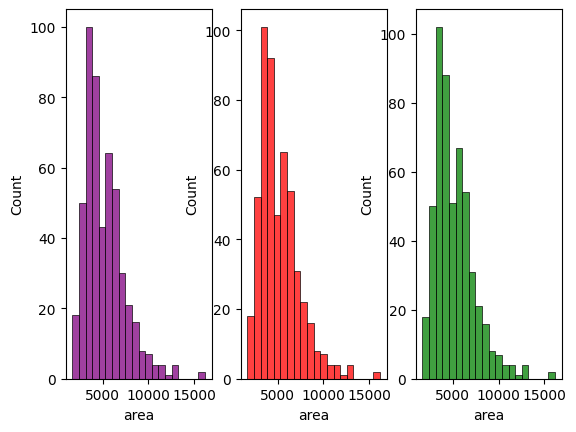

In [101]:
fig, ax =plt.subplots(1,3)
sns.histplot(HP['area'],bins=20, color="purple", ax=ax[0])
sns.histplot(Independent_knn['area'], color="red", bins=20, ax=ax[1])
sns.histplot(Independent_MICE['area'], color="green", bins=20, ax=ax[2])

<AxesSubplot: >

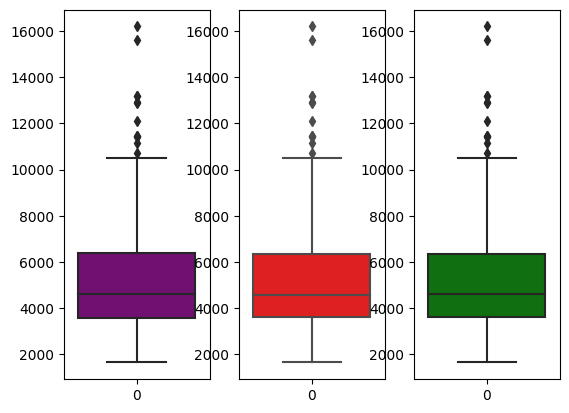

In [102]:
fig, ax =plt.subplots(1,3)
sns.boxplot(HP['area'], color="purple", ax=ax[0])
sns.boxplot(Independent_knn['area'], color="red", ax=ax[1])
sns.boxplot(Independent_MICE['area'], color="green", ax=ax[2])

In [103]:
Independent_knn.describe() # using describe function to see if there is any discrepency in numerical measures 

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5162.840220,1.964015,0.284091,1.803030,0.857955,0.179924,0.045455,0.320076,0.695076,1.077652
std,2182.518656,0.739655,0.503095,0.864123,0.349428,0.384489,0.208496,0.466948,0.860152,0.756774
min,1650.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,4580.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,16200.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


In [104]:
Independent_MICE.describe() # using describe function to see if there is any discrepency in numerical measures 

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,5169.721163,1.964015,0.284091,1.803030,0.857955,0.179924,0.045455,0.320076,0.695076,1.077652
std,2173.611257,0.739655,0.503095,0.864123,0.349428,0.384489,0.208496,0.466948,0.860152,0.756774
min,1650.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000
50%,4615.820057,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,16200.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


- From overall exploration it seems that MICE and KNN both performed well
- Hence, I will go ahead with KNN imputation

In [105]:
HP_miss = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
HP_miss.head(10)

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus,h_price
0,7420.000000,3.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,13300000.0
1,8960.000000,3.0,3.0,4.0,1.0,0.0,0.0,1.0,3.0,0.0,12250000.0
2,9960.000000,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,12250000.0
3,7500.000000,3.0,1.0,2.0,1.0,0.0,0.0,1.0,3.0,0.0,12215000.0
4,8099.945192,3.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,11410000.0
5,7500.000000,2.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,10850000.0
6,8580.000000,3.0,2.0,4.0,1.0,0.0,0.0,1.0,2.0,1.0,10150000.0
7,16200.000000,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,10150000.0
8,8100.000000,3.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,9870000.0
9,5750.000000,2.0,1.0,4.0,1.0,1.0,0.0,1.0,1.0,2.0,9800000.0


### Dealing with outliers

In [106]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = HP_miss['h_price'].quantile(0.25)
Q3 = HP_miss['h_price'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

5740000.0 3465000.0
2275000.0
9152500.0
52500.0


In [107]:
HP_miss_out = HP_miss[HP_miss.h_price < upper_bound]
HP_miss_out = HP_miss_out[HP_miss.h_price > lower_bound]
HP_miss_out.shape

C:\Users\prate\AppData\Local\Temp\ipykernel_19052\1866707801.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.h_price > lower_bound]


(513, 11)

<AxesSubplot: xlabel='h_price', ylabel='Count'>

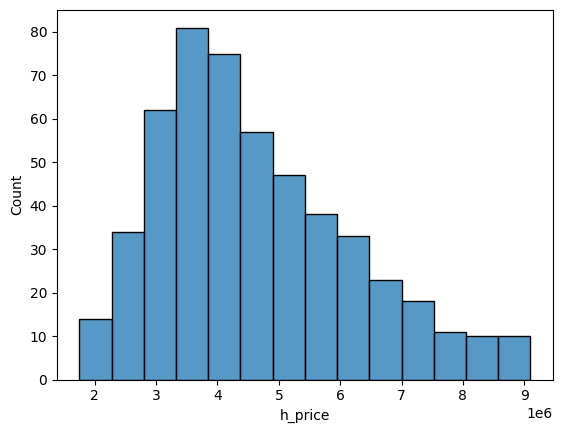

In [108]:
sns.histplot(HP_miss_out['h_price'])

In [109]:
# Here I am using IQR to remove outliers. I have already checked Z score and did not work well
# IQR for price column
Q1 = HP_miss_out['area'].quantile(0.25)
Q3 = HP_miss_out['area'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

6321.0 3584.0
2737.0
10426.5
-521.5


In [110]:
HP_miss_out = HP_miss_out[HP_miss.area < upper_bound]
HP_miss_out = HP_miss_out[HP_miss.area > lower_bound]
HP_miss_out.shape

C:\Users\prate\AppData\Local\Temp\ipykernel_19052\3980939757.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.area < upper_bound]
C:\Users\prate\AppData\Local\Temp\ipykernel_19052\3980939757.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HP_miss_out = HP_miss_out[HP_miss.area > lower_bound]


(500, 11)

<AxesSubplot: xlabel='area', ylabel='Count'>

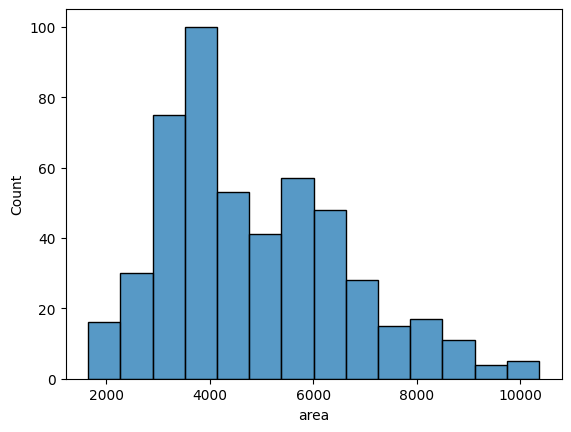

In [111]:
sns.histplot(HP_miss_out['area']) # examining distribution of area column 

- Even after removing outliers price and area columns are skewed. 
- For linear regression, errors should be normally distributed. However, as per central limit theorem if sample size is more than 30 we are good to go. 

<AxesSubplot: xlabel='h_price', ylabel='area'>

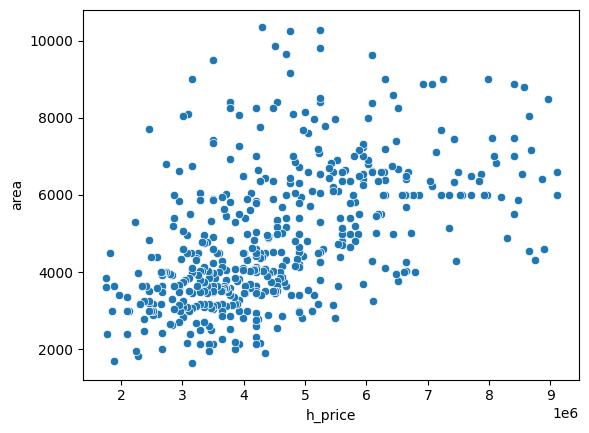

In [112]:
# scatter plot between area and price
sns.scatterplot(x=HP_miss_out.h_price,y=HP_miss_out.area) 

In [113]:
data = pd.DataFrame(HP_miss_out) # checking correlation only between price and area
print(data.corr(method = 'spearman'))

                      area  no_bedrooms  no_bathrooms  total_stories  \
area              1.000000     0.148777      0.195659       0.042915   
no_bedrooms       0.148777     1.000000      0.360151       0.510301   
no_bathrooms      0.195659     0.360151      1.000000       0.292542   
total_stories     0.042915     0.510301      0.292542       1.000000   
mainroad_loc      0.328205    -0.025744      0.027910       0.084053   
guestroom         0.251026     0.089055      0.156024       0.018469   
hotwater         -0.033229     0.014585      0.040439       0.051932   
airconditioner    0.295852     0.173915      0.209135       0.234156   
parking           0.334091     0.102540      0.131408      -0.008298   
furnishingstatus -0.155728    -0.133968     -0.161125      -0.101542   
h_price           0.572912     0.369470      0.453527       0.354870   

                  mainroad_loc  guestroom  hotwater  airconditioner   parking  \
area                  0.328205   0.251026 -0.033229   

- Price and area not very linear. There are moderate correlation.

In [114]:
HP_miss_out.head()

,area,no_bedrooms,no_bathrooms,total_stories,mainroad_loc,guestroom,hotwater,airconditioner,parking,furnishingstatus,h_price
15,6000.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,9100000.0
16,6600.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,9100000.0
17,8500.0,2.0,1.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0,8960000.0
18,4600.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,8890000.0
19,6420.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,8855000.0


In [115]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X_vif = HP_miss_out.drop(['h_price'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

            feature       VIF
0              area  9.662710
1       no_bedrooms  8.371096
2      no_bathrooms  1.595123
3     total_stories  7.045119
4      mainroad_loc  6.496517
5         guestroom  1.329238
6          hotwater  1.066743
7    airconditioner  1.746203
8           parking  1.913895
9  furnishingstatus  2.645623


- It seems that area, no_bedrooms, total_stories, and mainroad_loc are highly correlated

In [116]:
X_vif = HP_miss_out.drop(['h_price', 'no_bedrooms', 'total_stories', 'mainroad_loc'], axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]
  
print(vif_data)

            feature       VIF
0              area  4.740717
1      no_bathrooms  1.406234
2         guestroom  1.322778
3          hotwater  1.054821
4    airconditioner  1.639921
5           parking  1.888405
6  furnishingstatus  2.339361


- after removing no of bedrooms, total stories and main road location correlation values look better now

### Feature selection using selectK best method

In [117]:
X = HP_miss_out.drop(['h_price'], axis=1)
y = HP_miss_out['h_price']

In [118]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs          Score
0              area  172705.025438
8           parking     252.638749
2      no_bathrooms     227.441446
5         guestroom     224.755810
6          hotwater     200.336312
7    airconditioner     185.834255
9  furnishingstatus     129.899002
3     total_stories     118.837686
1       no_bedrooms      68.142844
4      mainroad_loc      34.609889


- It seems that number of bedrooms and main road location are not good predictor variable. However, total stories is also highly correlated with area.

In [119]:
# Linear regression
X_lin = HP_miss_out.drop(['h_price', 'no_bedrooms', 'total_stories', 'mainroad_loc'], axis=1)
y_lin = HP_miss_out['h_price']

In [120]:
X_lin.shape

(500, 7)

In [121]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.25, random_state=101)

In [122]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.31060248, -0.56034738, -0.47907014, ..., -0.66506217,
         0.42552676,  1.14918462],
       [-1.06247258,  1.60594404,  2.08737703, ..., -0.66506217,
        -0.75649202, -1.49464503],
       [-0.57308967,  1.60594404, -0.47907014, ..., -0.66506217,
         1.60754555, -0.1727302 ],
       ...,
       [-0.77329177,  1.60594404, -0.47907014, ..., -0.66506217,
        -0.75649202, -0.1727302 ],
       [ 0.53437748,  1.60594404,  2.08737703, ...,  1.50361882,
        -0.75649202, -0.1727302 ],
       [-0.17268548, -0.56034738, -0.47907014, ..., -0.66506217,
        -0.75649202, -0.1727302 ]])

In [123]:
X_test=sc.transform(X_test)
X_test

array([[ 1.07301645, -0.56034738,  2.08737703, -0.23102118,  1.50361882,
         0.42552676, -1.49464503],
       [ 1.35663608, -0.56034738, -0.47907014, -0.23102118, -0.66506217,
         0.42552676, -0.1727302 ],
       [ 0.51022611, -0.56034738,  2.08737703, -0.23102118, -0.66506217,
        -0.75649202, -0.1727302 ],
       [ 0.83944734,  1.60594404, -0.47907014, -0.23102118,  1.50361882,
         0.42552676, -0.1727302 ],
       [ 0.66148992, -0.56034738, -0.47907014, -0.23102118,  1.50361882,
        -0.75649202, -0.1727302 ],
       [-0.70099657, -0.56034738, -0.47907014, -0.23102118, -0.66506217,
        -0.75649202,  1.14918462],
       [-0.33952056,  1.60594404, -0.47907014, -0.23102118, -0.66506217,
         0.42552676,  1.14918462],
       [-0.50635564, -0.56034738, -0.47907014, -0.23102118, -0.66506217,
         0.42552676, -1.49464503],
       [ 0.32781976,  1.60594404,  2.08737703, -0.23102118, -0.66506217,
         1.60754555, -1.49464503],
       [-0.22829718, -0.5603

# Modelling

### Linear Regression

In [124]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [125]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [ 454387.28354584  529234.09968946  233658.87165741  183531.17282804
  511484.54082745  139233.85101772 -198056.11350198]


In [126]:
# fitting model into test data
y_pred = lm.predict(X_train)

In [127]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.5996252224553923


In [128]:
# calculting adjusted rsquared value
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.5955728461644549


In [129]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.8626451492309571e-10


- Mean value is close to 0 hence we are good to go

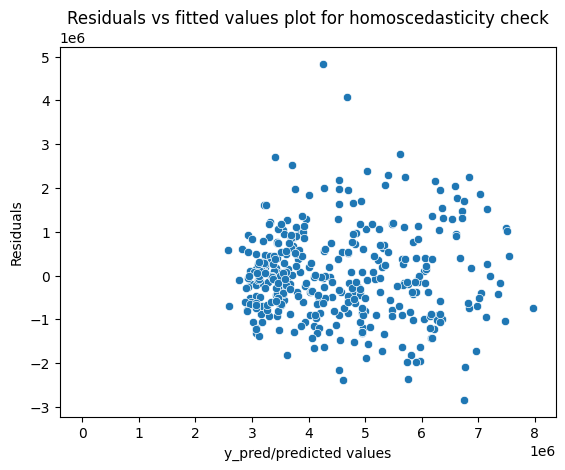

In [131]:
# scatter plot between predicted value and error
p = sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,2.6],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

C:\Users\prate\AppData\Local\Temp\ipykernel_19052\531944841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<AxesSubplot: xlabel='h_price', ylabel='Density'>

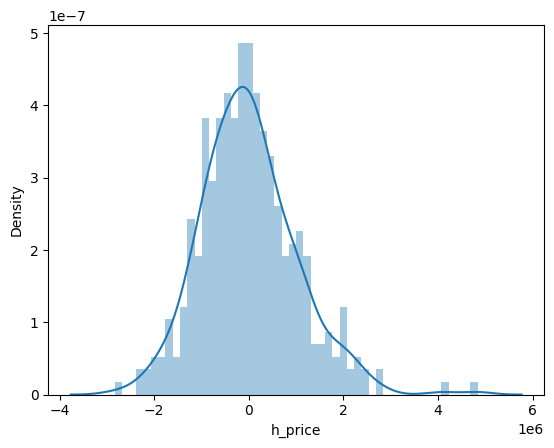

In [ ]:
# checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

In [ ]:
predictions = lm.predict(X_test) # predicting test set

In [ ]:
y_test.head()

33     8120000.0
390    3500000.0
128    5810000.0
19     8855000.0
183    5110000.0
Name: h_price, dtype: float64

In [ ]:
predictions


array([6281677.35859678, 4439817.25001955, 4490315.44352716,
       6460535.35334416, 5068621.44734263, 3078464.79825749,
       4553767.21692778, 3855110.81297147, 6144874.97376413,
       4402500.19435924, 2762599.21996671, 3640234.07774723,
       5630252.56746499, 4032126.15223299, 3747766.82894515,
       4946115.91555834, 3311625.79594224, 2899329.76373477,
       5093630.80641028, 3798965.24329942, 4825173.25553429,
       3839722.96385961, 4401513.34599252, 3606259.04987088,
       3694374.48525332, 3356426.50715337, 5966034.6793073 ,
       4595499.72848505, 3841596.03540799, 3221512.65359135,
       7033487.32169245, 3005460.59804046, 3141637.91391564,
       4704068.91960165, 4826624.76397847, 4893207.42831973,
       5950512.07318066, 3166907.1601789 , 2959699.34082015,
       3965220.50617658, 4512533.14754759, 3080991.72288381,
       3412345.77547152, 5439819.48021697, 4360407.17042129,
       4294569.39659833, 2883891.60203037, 3972801.28005556,
       4664313.50713044,

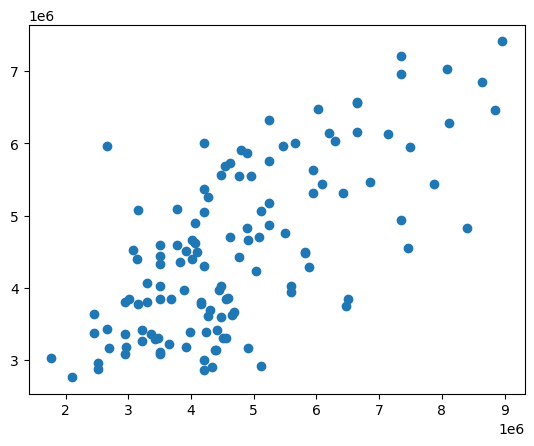

In [ ]:
# scatter plot between actaul and predicted value 
plt.scatter(y_test,predictions)

In [ ]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 898650.8669975961
MSE: 1295345910141.8623
RMSE: 1138132.6417170637


## Random forest regression

In [ ]:
# Importing library
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([6284985.        , 4934930.        , 3863860.        ,
       7569730.        , 4945640.        , 2300304.08333333,
       4692327.5       , 4061260.        , 4957960.        ,
       3612595.        , 2813510.        , 3441900.        ,
       6879180.        , 3078180.        , 4136300.        ,
       5318880.        , 3196697.        , 2497250.        ,
       4139800.        , 4450390.        , 4941860.        ,
       3917130.        , 4654930.        , 4104159.5       ,
       4759195.        , 3393740.        , 4271960.        ,
       4780510.        , 4412100.        , 3755220.        ,
       7903700.        , 3085458.83333333, 3037002.5       ,
       5009083.33333333, 4583460.        , 4839625.        ,
       4813620.        , 3113110.        , 2473030.        ,
       4785900.        , 3818955.        , 2300304.08333333,
       4234195.        , 4165420.        , 3965725.        ,
       4681880.        , 2476833.33333333, 4741100.        ,
       4327365.        ,

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 899333.5160000001
MSE: 1321000485483.2827
RMSE: 1149347.852255044


## Support vector regression

In [ ]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(X_test) # prediciting y

In [ ]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1189061.9623213564
MSE: 2634614332657.3945
RMSE: 1623149.510260036


### Conclusion
Here, we performed 3 different models to check which model seems to give a better accuracy or least error. Overall, number of bedrooms and location from the main road do not seem to be a good predictor of a house price. Hence, they were dropped from all models. Linear regression seems to be the best model as it has the lowest error, but linear relationship between price and area is not very linear. Random forest model may be the best model in this scenario. We can also perform cross validation and parameter optimization to improve the model accuracy.  